# Data manipulation

Downloading files

In [1]:
import pandas as pd

maxim_40 = pd.read_csv("C:/Users/katri/Documents/Katrijn/school/Statistiek/MDA/Assignment/export_40/csv_results_40_255439_mp-01-naamsestraat-35-maxim.csv", delimiter=";")
xior_40 = pd.read_csv("C:/Users/katri/Documents/Katrijn/school/Statistiek/MDA/Assignment/export_40/csv_results_40_255440_mp-02-naamsestraat-57-xior.csv", delimiter=";")
taste_40 = pd.read_csv("C:/Users/katri/Documents/Katrijn/school/Statistiek/MDA/Assignment/export_40/csv_results_40_255441_mp-03-naamsestraat-62-taste.csv", delimiter=";")

maxim_42 = pd.read_csv("C:/Users/katri/Documents/Katrijn/school/Statistiek/MDA/Assignment/export_42/csv_results_42_255439_mp-01-naamsestraat-35-maxim.csv", delimiter=";")
taste_42=pd.read_csv("C:/Users/katri/Documents/Katrijn/school/Statistiek/MDA/Assignment/export_42/csv_results_42_255441_mp-03-naamsestraat-62-taste.csv", delimiter=";")



Creating date and time columns

time as time object

In [2]:
taste_42['result_timestamp'] = pd.to_datetime(taste_42["result_timestamp"], format='%d/%m/%Y %H:%M:%S.%f')
taste_42['Day'] = taste_42['result_timestamp'].dt.date
taste_42["Hour"] = taste_42['result_timestamp'].dt.hour

#only hours between 19u00 and 06u00
taste_42_night = taste_42.loc[(taste_42["Hour"] < 6 ) | (taste_42["Hour"] > 18)]

# 10 minute scale
taste_42_night.loc[:, '10_minute_scale'] = ((taste_42_night['result_timestamp'].dt.minute // 10) + 1)

laeq_per_minute = taste_42_night.groupby(['Day', 'Hour','10_minute_scale'])['laeq'].mean().reset_index()
taste_42_night = pd.merge(taste_42_night, laeq_per_minute, on=['Day', 'Hour','10_minute_scale'], suffixes=('', '_mean'))
taste_42_night.drop_duplicates(subset=['Day', 'Hour','10_minute_scale'], inplace=True)

# shiften timestamp to form cohesive nights
taste_42_night.loc[:, 'night'] = (taste_42_night['result_timestamp'] - pd.Timedelta(hours=6)).dt.strftime('%d-%m-%Y')   #night from monday to tuesday counted as monday
taste_42_night.loc[:, 'night_hour'] = pd.to_datetime((taste_42_night['result_timestamp'] - pd.Timedelta(hours=6)).dt.strftime('%H:%M')).dt.strftime('%H:%M')  # 19u00 in real time is now 13u00 on new scale

# create continuous time variable (in hours) starting from 13u00 nighttime
taste_42_night['night_hour_timeobject']=pd.to_datetime(taste_42_night['night_hour'], format='%H:%M')
taste_42_night['night_hour_num'] = (taste_42_night['night_hour_timeobject'].dt.hour + taste_42_night['night_hour_timeobject'].dt.minute/60)-13



C:\Users\katri\AppData\Local\Temp\ipykernel_12264\2089480153.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taste_42_night.loc[:, '10_minute_scale'] = ((taste_42_night['result_timestamp'].dt.minute // 10) + 1)
C:\Users\katri\AppData\Local\Temp\ipykernel_12264\2089480153.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  taste_42_night.loc[:, 'night_hour'] = pd.to_datetime((taste_42_night['result_timestamp'] - pd.Timedelta(hours=6)).dt.strftime('%H:%M')).dt.strftime('%H:%M')  # 19u00 in real time is now 13u00 on new scale


Plotting individual plots

C:\Users\katri\AppData\Local\Temp\ipykernel_4136\36168291.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels, rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


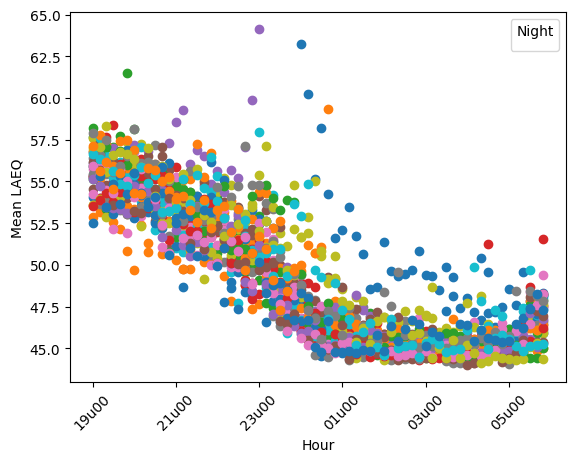

In [111]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#convert night_hour to numeric
#taste_42_night['night_hour'] = pd.to_numeric(taste_42_night['night_hour'].apply(str))

#create scatterplot
for night in taste_42_night['night'].unique():
        night_data = taste_42_night[taste_42_night['night'] == night]
        ax.scatter(night_data['night_hour_num'], night_data['laeq_mean'])


tick_labels = ['0','19u00', '21u00', '23u00', '01u00', '03u00', '05u00']  # manually set tick labels to correspond with original hours
ax.set_xticklabels(tick_labels, rotation=45)

ax.legend(title='Night')
ax.set_xlabel('Hour')
ax.set_ylabel('Mean LAEQ')

plt.show()

c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\katri\AppData\Local\Temp\ipykernel_4136\2707279932.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels, rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


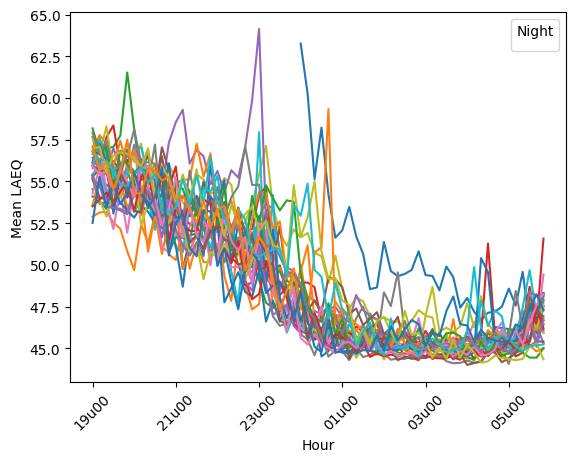

In [140]:
import matplotlib.pyplot as plt
taste_42_night['night_hour_num_log'] = np.log(taste_42_night['night_hour_num'])


fig, ax = plt.subplots()

#create scatterplot
for night in taste_42_night['night'].unique():
        night_data = taste_42_night[taste_42_night['night'] == night]
        ax.plot(night_data['night_hour_num'], night_data['laeq_mean'])


tick_labels = ['0','19u00', '21u00', '23u00', '01u00', '03u00', '05u00']  # manually set tick labels to correspond with original hours
ax.set_xticklabels(tick_labels, rotation=45)

ax.legend(title='Night')
ax.set_xlabel('Hour')
ax.set_ylabel('Mean LAEQ')

plt.show()

# Mixed model
## statsmodels packages

- cubic model did not converge
- square model with square random effects did not converge

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_formula = 'laeq_mean ~ night_hour_num + night_hour_num_sq + night_hour_num_cu'
taste_42_night['night_hour_num_sq'] = taste_42_night['night_hour_num'] ** 2
taste_42_night['night_hour_num_cu'] = taste_42_night['night_hour_num'] ** 3
mixmod=smf.mixedlm(model_formula, data=taste_42_night, groups=taste_42_night['night'], re_formula="1+night_hour_num")
mixmodf = mixmod.fit()
print(mixmodf.summary())


c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warn

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     laeq_mean 
No. Observations:       2046        Method:                 REML      
No. Groups:             32          Scale:                  1.6907    
Min. group size:        30          Log-Likelihood:         -3579.9088
Max. group size:        66          Converged:              No        
Mean group size:        63.9                                          
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                  56.012    0.447 125.282 0.000 55.136 56.888
night_hour_num             -0.409    0.107  -3.821 0.000 -0.619 -0.199
night_hour_num_sq          -0.360    0.019 -18.947 0.000 -0.397 -0.322
night_hour_num_cu           0.030    0.001  25.858 0.000  0.028  0.032
Group Var              

c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 183.089371
  warnings.warn(msg, ConvergenceWarning)
c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian m

## using SAS through SASPY

Connecting python to SAS ond demand for academics
requirements:
- Java 7 or 8
- install SASPY python package
- install required jar files in the saspy/java/iomclient directory of the SASPy installation in your Python environment. (https://support.sas.com/downloads/package.htm?pid=2494#)
- create _authinfo file with SAS login credentials or provide manually

Dataset fro data wrangling

In [16]:
import pandas as pd
import os
from geopy.geocoders import Nominatim
import pandas as pd
from datetime import datetime

# Time regrouping
def TimeBasedRegrouping(parquet):
    df = pd.read_parquet(parquet)

    df = df.loc[(df['result_timestamp'].dt.hour <= 7) | (df['result_timestamp'].dt.hour >= 19)]
    df.loc[:, 'night_scale'] = (df['result_timestamp'] - pd.Timedelta(hours=8)).dt.strftime('%d-%m-%Y %H:%M')
    df['night_scale'] = pd.to_datetime(df['night_scale'])
    #night from monday to tuesday counted as monday
    df.loc[:, 'night_hour'] = (df['night_scale'].dt.hour + df['night_scale'].dt.minute/60) - 11
    df.loc[:, 'night'] = df['night_scale'].dt.strftime('%d-%m-%Y')

    return df

# loop over parquet files & create dataframes. Store them in a list
collection_dfs = []
directory = "Dataset/"
for filename in os.listdir(directory):
    df_parquet = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(df_parquet):
        df = TimeBasedRegrouping(df_parquet)
        collection_dfs.append(df)

# Create Holidays and Days of the week
def createHolidaysDaysoftheWeek(df):
    df["weekday"] = df['night_scale'].dt.day_name()
    holiday = ["01-01-2022", "18-04-2022", "16-05-2022", "21-07-2022", "25-08-2022", "01-11-2022", "02-11-2022","11-11-2022", "25-12-2022"]
    is_holiday = df['night'].isin(holiday)
    df['Holiday']=is_holiday.map({True: 1, False:0})
    
    down_season = [
        (datetime.strptime("2021-12-31 00:00:00", '%Y-%m-%d %H:%M:%S'), datetime.strptime("2022-02-13 00:00:00", '%Y-%m-%d %H:%M:%S')),
        (datetime.strptime("2022-04-02 00:00:00", '%Y-%m-%d %H:%M:%S'), datetime.strptime("2022-04-19 00:00:00", '%Y-%m-%d %H:%M:%S')),
        (datetime.strptime("2022-05-28 00:00:00", '%Y-%m-%d %H:%M:%S'), datetime.strptime("2022-09-26 00:00:00", '%Y-%m-%d %H:%M:%S')),
        (datetime.strptime("2022-12-24 00:00:00", '%Y-%m-%d %H:%M:%S'), datetime.strptime("2023-01-01 00:00:00", '%Y-%m-%d %H:%M:%S')),
    ]
    is_downseason = False
    for start_date, end_date in down_season:
        is_downseason = is_downseason | ((df['night_scale'] >= start_date) & (df['night_scale'] <= end_date))
    df['downseason'] = is_downseason.astype(int)
    return df

for df in collection_dfs:
    createHolidaysDaysoftheWeek(df)


# Latitude and Longitude

# Initialize Nominatim API
geolocator = Nominatim(user_agent="Mozilla/5.0")

# Get Lat and Long based on the address
def get_lat_long(address):
    location = geolocator.geocode(address)
    if location is None:
        return None, None
    return location.longitude, location.latitude

# For now, it is only reading STUK dataframe, but this can be expanded for multiple events dataframes
def createLatLongCols(df):
    df = pd.read_csv(df)
    df['Longitude'] = ""
    df['Latitude'] = ""
    # Loop door de dataset en vul de longitudinale en latitudinale kolommen in
    for index, row in df.iterrows():
        address = row[1]
        longitude, latitude = get_lat_long(address)
        df.at[index, 'Longitude'] = longitude
        df.at[index, 'Latitude'] = latitude
    
    return df

createLatLongCols("event_datasets/df_stuk_events.csv")


C:\Users\katri\AppData\Local\Temp\ipykernel_20472\3868638245.py:13: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['night_scale'] = pd.to_datetime(df['night_scale'])
C:\Users\katri\AppData\Local\Temp\ipykernel_20472\3868638245.py:13: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['night_scale'] = pd.to_datetime(df['night_scale'])
C:\Users\katri\AppData\Local\Temp\ipykernel_20472\3868638245.py:13: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['night_scale'] = pd.to_datetime(df['night_scale'])
C:\Users\katri\AppData\Local\Temp\ipykernel_20472\3868638245.py:13: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when da

,Name,Address,Date,Location,Organizer,Event type,Day,DateTime,Responded,Longitude,Latitude
0,Leuven Kritiek IV,"Naamsestraat 96, 3000 Leuven",do 1 sep 2022 20:00 - wo 12 okt 2022,Leuven,Stuk,Other,1-sep,20:00,NaN,4.699638,50.873808
1,Lustwarande : BRIEF ENCOUNTERS '22 #2,"Naamsestraat 96, 3000 Leuven",zo 4 sep 2022 14:00,Park De Oude Warande,Stuk,Other,4-sep,14:00,NaN,4.699638,50.873808
2,OPEN CALL Showcase Emerging Sound 2023,"Naamsestraat 96, 3000 Leuven",wo 7 sep 2022 20:00 - za 15 okt 2022,STUK,Stuk,Other,7-sep,20:00,200.0,4.699638,50.873808
3,"Studio STUK • Dans, Beeld & Geluid in de iconi...","Naamsestraat 96, 3000 Leuven",ma 26 sep 2022 20:00 - za 12 nov 2022 23:00,Manhattan,Stuk,Other,26-sep,20:00,1000.0,4.699638,50.873808
4,Charles Atlas - Life’s a beach • Studio STUK,"Naamsestraat 96, 3000 Leuven",ma 26 sep 2022 20:00 - zo 2 okt 2022 23:00,Manhattan,Stuk,Other,26-sep,20:00,1000.0,4.699638,50.873808
5,APHASIA • Studio STUK,"Naamsestraat 96, 3000 Leuven",ma 26 sep 2022 20:30,Manhattan,Stuk,Other,26-sep,20:30,1000.0,4.699638,50.873808
6,Tien Om Te Zien • Studio STUK opening night,"Naamsestraat 96, 3000 Leuven",do 29 sep 2022 19:30,Manhattan,Stuk,Other,29-sep,19:30,1000.0,4.699638,50.873808
7,followfollow,"Naamsestraat 96, 3000 Leuven",vr 30 sep 2022 20:00,30CC/Schouwburg,Stuk,Other,30-sep,20:00,500.0,4.699638,50.873808
8,M I M I curates • Studio STUK & Het Depot,"Naamsestraat 96, 3000 Leuven",za 1 okt 2022 19:30,Manhattan,Stuk,Other,1-okt,19:30,1000.0,4.699638,50.873808
9,Jazz Op Zondag: schntzl • Studio STUK,"Naamsestraat 96, 3000 Leuven",zo 2 okt 2022 19:30,Manhattan,Stuk,Other,2-okt,19:30,1000.0,4.699638,50.873808


Start SAS session

In [17]:
night_81 = collection_dfs[0]
night_calverie = collection_dfs[1]
night_filosovia = collection_dfs[2]
night_hears = collection_dfs[3]
night_maxim = collection_dfs[4]
night_taste = collection_dfs[5]
night_vrijthof = collection_dfs[6]
night_xior = collection_dfs[7]

night_81.to_csv('Dataset/night_datasets_KADI/night_81.csv')
night_calverie.to_csv('Dataset/night_datasets_KADI/night_calverie.csv')
night_filosovia.to_csv('Dataset/night_datasets_KADI/night_filosovia.csv')
night_hears.to_csv('Dataset/night_datasets_KADI/night_hears.csv')
night_maxim.to_csv('Dataset/night_datasets_KADI/night_maxim.csv')
night_taste.to_csv('Dataset/night_datasets_KADI/night_taste.csv')
night_vrijthof.to_csv('Dataset/night_datasets_KADI/night_vrijthof.csv')
night_xior.to_csv('Dataset/night_datasets_KADI/night_xior.csv')

night_collection = [night_81, night_calverie, night_filosovia, night_hears, night_maxim, night_taste, night_vrijthof, night_xior]

07-05 model selection in sas itself:

* full model (random cu did not converge, holiday not included)
proc mixed data=data.all_sites;
class night weekday site downseason;
model laeq=night_hour  night_hour_sq night_hour_cu weekday Holiday downseason 
	night_hour*downseason night_hour_sq*downseason night_hour_cu*downseason 
	night_hour*weekday night_hour_sq*weekday night_hour_cu*weekday
	night_hour*downseason*weekday night_hour_sq*downseason*weekday night_hour_cu*downseason*weekday
	downseason*weekday / solution;   *structure of the mean effects;
random intercept night_hour night_hour_sq / subject=night(site) type=un;  * structure of the random effects(allow for individual intercepts, slopes and curvature);
*type=un  is the allowed correlations between the random effects. Here no restrictions are placed (un=unstructured)
run; 

* after backwards selection manually;
proc mixed data=data.all_sites;
class night weekday site downseason;
model laeq=night_hour  night_hour_sq night_hour_cu weekday Holiday downseason 
	night_hour*downseason night_hour_sq*downseason night_hour_cu*downseason 
	night_hour*weekday night_hour_sq*weekday night_hour_cu*weekday
	night_hour*downseason*weekday night_hour_sq*downseason*weekday night_hour_cu*downseason*weekday
	 / solution;   *structure of the mean effects;
random intercept night_hour night_hour_sq/ subject=night(site) type=un;  * structure of the random effects(allow for individual intercepts, slopes and curvature);
run; 

* make combined dataset in python
* add sq and cu in python

In [13]:
import saspy
# starting sas session
sas = saspy.SASsession(
# own pathway to your Java 7 or 8 file on
java='C:\\Program Files (x86)\\Java\\jre-1.8\\bin\\java.exe',
#European Home Region 1
iomhost=['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
iomport= 8591,
authkey= 'oda',
encoding ='utf-8')
sas


Using SAS Config named: default
SAS Connection established. Subprocess id is 28068



Access Method         = IOM
SAS Config name       = default
SAS Config file       = c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics-Backend\.venv\lib\site-packages\saspy\sascfg.py
WORK Path             = /saswork/SAS_work268D000018A1_odaws02-euw1.oda.sas.com/SAS_work0BC1000018A1_odaws02-euw1.oda.sas.com/
SAS Version           = 9.04.01M7P08062020
SASPy Version         = 5.1.2
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 6305


In [14]:
#converting pandas dataframe to sas table (use the specified table name in sas specific functions)
for df in night_collection: # creating a SAS dataframe
    sas.df2sd(df, '{df}_SAS')


c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics-Backend\.venv\lib\site-packages\saspy\sasioiom.py:1556: UserWarning: Note that Indexes are not transferred over as columns. Only actual columns are transferred
  warnings.warn("Note that Indexes are not transferred over as columns. Only actual columns are transferred")
c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics-Backend\.venv\lib\site-packages\saspy\sasioiom.py:1556: UserWarning: Note that Indexes are not transferred over as columns. Only actual columns are transferred
  warnings.warn("Note that Indexes are not transferred over as columns. Only actual columns are transferred")
c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics-Backend\.venv\lib\site-packages\saspy\sasioiom.py:1556: UserWarning: Note that Indexes are not transferred over as columns. Only actual columns are transferred
  warnings.warn("Note that Indexes are not transferred over as columns. Only a

Performing mixed model in SAS
- cubic models converges + fixed effect follow individual trends rather good

In [39]:
mixed_model_code = """
data test_maxim_df_night_sas_table;
set test_maxim_df_night_sas_table;
night_hour_sq = night_hour*night_hour;
night_hour_cu = night_hour_sq*night_hour;
run;

proc mixed data=test_maxim_df_night_sas_table;
class night;
model laeq=night_hour  night_hour_sq night_hour_cu / solution;   *structure of the mean effects;
random intercept night_hour_sq night_hour_cu / subject=night type=un solution;  * structure of the random effects(allow for individual intercepts, slopes and curvature);
*type=un  is the allowed correlations between the random effects. Here no restrictions are placed (un=unstructured);
ods output solutionf=fixed_effects_out;  * solution of fixed effects;
run; 

"""

mixed_model_sas = sas.submit(mixed_model_code)

print(mixed_model_sas['LOG'])

model_parameters = sas.sasdata(table='fixed_effects_out', libref='work').to_df()
print(model_parameters)


37                                                         The SAS System                               maandag  1 mei 2023 13:28:00

124116     ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
124116   ! ods graphics on / outputfmt=png;
124117     
124118     
124119     data test_maxim_df_night_sas_table;
124120     set test_maxim_df_night_sas_table;
124121     night_hour_sq = night_hour*night_hour;
124122     night_hour_cu = night_hour_sq*night_hour;
124123     run;
124124     
124125     proc mixed data=test_maxim_df_night_sas_table;
124126     class night;
124127     model laeq=night_hour  night_hour_sq night_hour_cu / solution;   *structure of the mean effects;
124128     random intercept night_hour_sq night_hour_cu / subject=night type=un solution;  * structure of the random effects(allow
124128   ! for individual intercepts, slopes and curvature);
124129     *type=un  is the allowed correlations between the 

In [42]:
#submitting SAS code
mixed_model_code = """
data test_maxim_df_night_sas_table;
set test_maxim_df_night_sas_table;
night_hour_sq = night_hour*night_hour;
night_hour_cu = night_sq*night_hour;
run;

proc mixed data=test_maxim_df_night_sas_table;
class night;
model laeq=night_hour  night_hour_sq night_hour_cu / solution;   *structure of the mean effects;
random intercept night_hour_sq / subject=night type=un solution;  * structure of the random effects(allow for individual intercepts, slopes and curvature);
*type=un  is the allowed correlations between the random effects. Here no restrictions are placed (un=unstructured);
ods output solutionf=fixed_effects_out;  * solution of fixed effects;
ods output solutionr=model_cu_out;   *solution of the individual random effects
run;


"""
mixed_model_sas = sas.submit(mixed_model_code)

print(mixed_model_sas['LOG'])

model_parameters = sas.sasdata(table='fixed_effects_out', libref='work').to_df()
print(model_parameters)


49                                                         The SAS System                               maandag  1 mei 2023 13:28:00

124309     ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
124309   ! ods graphics on / outputfmt=png;
124310     
124311     
124312     data test_maxim_df_night_sas_table;
124313     set test_maxim_df_night_sas_table;
124314     night_hour_sq = night_hour*night_hour;
124315     night_hour_cu = night_sq*night_hour;
124316     run;
124317     
124318     proc mixed data=test_maxim_df_night_sas_table;
124319     class night;
124320     model laeq=night_hour  night_hour_sq night_hour_cu / solution;   *structure of the mean effects;
124321     random intercept night_hour_sq / subject=night type=un solution;  * structure of the random effects(allow for individual
124321   ! intercepts, slopes and curvature);
124322     *type=un  is the allowed correlations between the random effects. Her

In [ ]:
*creating individual plots for each night to check fit of fixed effects;

proc sort data=model_cu_out out=model_cu_out;
by night;
run; 
proc transpose data=model_cu_out(keep= night Effect Estimate) out=model_cu_out_trans(rename=(COL1=Intercept COL2=hour COL3=hour2) drop=_NAME_);
by night;
run;

data model_cu_pred;
set model_cu_out_trans;
by night;
do time = 0 to 11 by 0.1;
    laeq_pred = (Intercept+55.8440) + (hour-0.3512)*time + (hour2-0.3659)*time**2 + (0.03000)*time**3; 
    output;
drop hour hour2 Intercept;
end;
run;

proc sort data=test_maxim_df_night_sas_table out=test_maxim_df_night_sas_table;
by night;
run;
proc sort data=model_cu_pred out=model_cu_pred;
by night;
run;

data model_cu_merge_pred;
merge test_maxim_df_night_sas_table model_cu_pred;
by night;
run;

ods pdf file='individual_graphs_hour3.pdf';
proc sgpanel data=model_cu_merge_pred;
panelby night;
scatter x=night_hour_num y=laeq;
series  x=time y=laeq_pred;
ods pdf close;
run;


In [102]:
from IPython.display import Image
plot_paht=sas.saspath('sgplot.png')
Image(filename=plot_paht)

AttributeError: 'SASsession' object has no attribute 'saspath'

In [43]:
model_parameters = sas.sasdata(table='model_cu_out', libref='work').to_df()

end sas session!

In [18]:
sas.endsas

<bound method SASsession.endsas of Access Method         = IOM
SAS Config name       = default
SAS Config file       = c:\Users\katri\Documents\Python_scripts\MDA_project\Modern-Data-Analytics-Backend\.venv\lib\site-packages\saspy\sascfg.py
WORK Path             = /saswork/SAS_work268D000018A1_odaws02-euw1.oda.sas.com/SAS_work0BC1000018A1_odaws02-euw1.oda.sas.com/
SAS Version           = 9.04.01M7P08062020
SASPy Version         = 5.1.2
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 6305

>